## RADS Level Presentation
#### By Charlotte :)

#### Importing things I need

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Reading the Pkls with the RADS Level Info and the Avalanche Info

In [2]:
rads = pd.read_pickle('../data-prep/pkl/rads.pkl')
rads['Date']= pd.to_datetime(rads['Date'])
avy = pd.read_pickle('../data-prep/pkl/avy_obs.pkl')

#### Making a new Dataframe that combines the RADS information and the Avalanche Information

In [3]:
avy['Date'] = avy['avobsdate']

In [4]:
radsavy = pd.merge(rads, avy, on=["Date"])
radsavy

,Date,Time,Score,Level,avpathid,avobsdate,avobstime,avobserverid,avtype,avtriggertyp,...,deb_hwy,deb_hwy_w,deb_hwy_d,avcomment,edcr_user,edcr_time,edcr_ip,eded_user,eded_time,eded_ip
0,2007-01-19,00:00:00,NaN,2,SHED11,2007-01-19,13:20:00,stein_01,U,NaN,...,False,0.0,0.0,NaN,NaN,2016-03-17 11:50:56,NaN,NaN,0000-00-00 00:00:00,NaN
1,2007-02-07,00:00:00,NaN,1,SHED11,2007-02-07,09:30:00,stein_01,GS,5.0,...,False,0.0,0.0,"Debris terminated in bottom of run out, but st...",NaN,2016-03-17 11:50:56,NaN,Adam,2020-05-28 14:26:45,139.51.15.17
2,2007-02-07,00:00:00,NaN,1,JAVA,2007-02-07,09:45:00,clark_01,SS,5.0,...,False,0.0,0.0,Located on the top of Java Mountain.,Adam,2020-05-28 14:31:17,139.51.15.17,NaN,0000-00-00 00:00:00,NaN
3,2007-02-16,00:00:00,NaN,1,PATH1163,2007-02-16,10:10:00,stein_01,L,5.0,...,False,0.0,0.0,Debris ran 1/2 path terminating above the rail.,NaN,2016-03-17 11:50:56,NaN,Adam,2020-05-28 14:27:39,139.51.15.17
4,2007-02-16,00:00:00,NaN,1,JAKES,2007-02-16,10:10:00,stein_01,SS,5.0,...,False,0.0,0.0,Debris ran 1/2 path terminating above the rail.,NaN,2016-03-17 11:50:56,NaN,Adam,2020-05-28 14:28:15,139.51.15.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
480,2022-03-01,00:00:00,80.0,3,SHED07W,2022-03-01,05:04:00,clark_01,SS,5.0,...,False,0.0,0.0,Slab not observed until March 17th during a sk...,Adam,2022-03-17 21:17:04,10.30.72.4,NaN,0000-00-00 00:00:00,NaN
481,2022-03-02,00:00:00,70.0,2,INFINITY,2022-03-02,11:35:00,clark_01,WL,5.0,...,False,0.0,0.0,One of the last avalanches observed during the...,Adam,2022-03-15 13:38:53,10.30.72.4,NaN,0000-00-00 00:00:00,NaN
482,2022-03-23,00:00:00,41.0,1,AP1163H,2022-03-23,13:30:00,clark_01,WL,5.0,...,False,0.0,0.0,NaN,Adam,2022-03-23 21:32:42,10.30.72.4,NaN,0000-00-00 00:00:00,NaN
483,2022-03-23,00:00:00,41.0,1,SHED10,2022-03-23,13:30:00,clark_01,WL,5.0,...,False,0.0,0.0,Obs on Mar. 24th from Hwy,Adam,2022-03-28 16:30:35,10.30.72.4,NaN,0000-00-00 00:00:00,NaN


#### My goal is to make a piechart but first I have to get my data organized the way I want

#### Here I've found how many of each level we have in the original RADS dataframe

In [5]:
levelstot = rads['Level'].value_counts()
levelstot

1    384
2    328
3     68
4     10
5      4
Name: Level, dtype: int64

#### We can see that there are 384 Level 1s, 328 Level 2s, etc.

#### Now I'm taking this information to find how many levels we have in our RADS Level dataframe

In [6]:
levelssum = rads['Level'].value_counts().sum()
levelssum

794

#### There are 794 entries of Levels in total

#### Now I want the percentage of each Level in the RADS Level Dataframe

In [7]:
levelsaver = [384/794, 328/794, 68/794, 10/794, 4/794]
levelsaver

[0.4836272040302267,
 0.41309823677581864,
 0.08564231738035265,
 0.012594458438287154,
 0.005037783375314861]

#### These are in order of Level # so we can see that Level 1 is 48% of the entries

#### Now I'm getting information about the Levels when there is an avalanche. For example, this is telling us that there are 203 avalanches where the Level was 2

In [8]:
levelsavy = radsavy['Level'].value_counts()
levelsavy

2    203
3    157
1     56
4     46
5     23
Name: Level, dtype: int64

#### Now I want to get percentages for my pie chart. 

#### With these percentages we first take the percentage of a Level in the total Level entries (such as 48% for Level 1. We put this decimal under 1 because we are trying to weigh the percentage. 

#### And then we multiple it by numbers above which show the number of avalanches during a Level

In [9]:
levelsper = [(1/0.4836272040302267)*56, 1/(0.41309823677581864)*203, 1/(0.08564231738035265)*157, 1/(0.012594458438287154)*46, 1/(0.005037783375314861)*23]
levelsper

[115.79166666666667,
 491.4085365853659,
 1833.205882352941,
 3652.3999999999996,
 4565.5]

#### With this list, we can make a piechart

([<matplotlib.patches.Wedge at 0x7f87331c6550>,
 [Text(1.099359383033118, 0.037535941936254584, 'Level 1'),
  Text(1.075116662458594, 0.23264600169333244, 'Level 2'),
  Text(0.6852363423172362, 0.8604947153630262, 'Level 3'),
  Text(-0.8911685531675553, 0.6448399877839822, 'Level 4'),
  Text(0.24551414215175343, -1.0722512793200523, 'Level 5')])

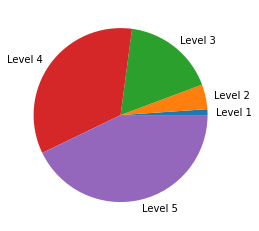

In [10]:
plt.pie(levelsper, labels = ['Level 1', 'Level 2', 'Level 3', 'Level 4', 'Level 5'])

#### Here is the pie chart. It shows the percentage of avalanches during a certain level. Yay!